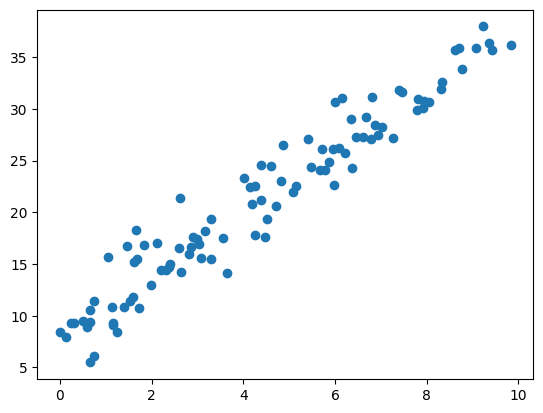

In [1]:
import numpy as np

x_data = np.random.rand(100) * 10
noise = np.random.normal(0, 2, x_data.shape)
y_data = 3*x_data + 8 + noise


# plot the data

import matplotlib.pyplot as plt
plt.scatter(x_data, y_data)
plt.show()

In [2]:
# solve the equation above using pytorch

import torch

class MySimpleNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


def loss(y, y_pred):
    return ((y_pred - y)**2).mean()


model = MySimpleNeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

x_tensor = torch.from_numpy(x_data).float().view(-1, 1)
y_tensor = torch.from_numpy(y_data).float().view(-1, 1)

for epoch in range(100):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}, loss {l.item():.4f}, w {model.linear.weight.item():.4f}, b {model.linear.bias.item():.4f}')

epoch 1, loss 313.1221, w 2.7363, b 0.5440
epoch 11, loss 17.7334, w 4.1524, b 1.1714
epoch 21, loss 16.3898, w 4.0928, b 1.5315
epoch 31, loss 15.1830, w 4.0357, b 1.8727
epoch 41, loss 14.0993, w 3.9817, b 2.1961
epoch 51, loss 13.1259, w 3.9304, b 2.5025
epoch 61, loss 12.2517, w 3.8819, b 2.7929
epoch 71, loss 11.4666, w 3.8358, b 3.0681
epoch 81, loss 10.7615, w 3.7922, b 3.3290
epoch 91, loss 10.1282, w 3.7509, b 3.5761


Text(0.5, 1.0, 'y = 3.7155x + 3.7875')

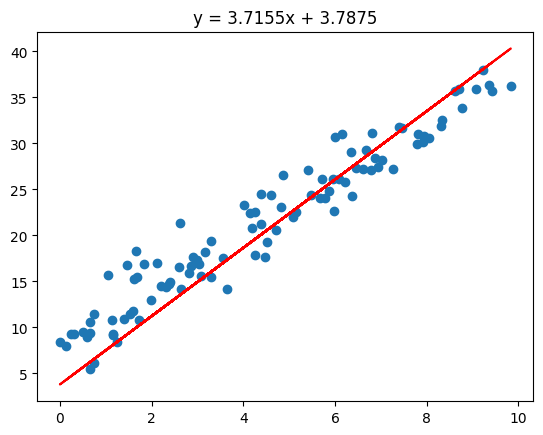

In [3]:
# Plot the result
plt.scatter(x_data, y_data)
plt.plot(x_data, model(x_tensor).detach().numpy(), 'r')

plt.title('y = {:.4f}x + {:.4f}'.format(model.linear.weight.item(), model.linear.bias.item()))

In [4]:

for epoch in range(200):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}, loss {l.item():.4f}, w {model.linear.weight.item():.4f}, b {model.linear.bias.item():.4f}')

epoch 1, loss 9.5595, w 3.7117, b 3.8104
epoch 11, loss 9.0487, w 3.6746, b 4.0324
epoch 21, loss 8.5900, w 3.6394, b 4.2427
epoch 31, loss 8.1780, w 3.6061, b 4.4421
epoch 41, loss 7.8079, w 3.5745, b 4.6310
epoch 51, loss 7.4756, w 3.5445, b 4.8101
epoch 61, loss 7.1771, w 3.5162, b 4.9798
epoch 71, loss 6.9091, w 3.4893, b 5.1406
epoch 81, loss 6.6683, w 3.4638, b 5.2930
epoch 91, loss 6.4521, w 3.4396, b 5.4374
epoch 101, loss 6.2579, w 3.4168, b 5.5743
epoch 111, loss 6.0835, w 3.3951, b 5.7040
epoch 121, loss 5.9269, w 3.3745, b 5.8269
epoch 131, loss 5.7862, w 3.3550, b 5.9434
epoch 141, loss 5.6599, w 3.3366, b 6.0538
epoch 151, loss 5.5464, w 3.3191, b 6.1585
epoch 161, loss 5.4445, w 3.3025, b 6.2576
epoch 171, loss 5.3530, w 3.2868, b 6.3516
epoch 181, loss 5.2708, w 3.2719, b 6.4406
epoch 191, loss 5.1970, w 3.2578, b 6.5250


Text(0.5, 1.0, 'y = 3.2457x + 6.5972')

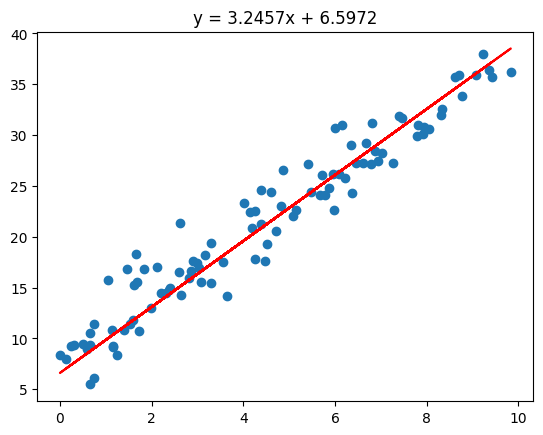

In [5]:
# Plot the result
plt.scatter(x_data, y_data)
plt.plot(x_data, model(x_tensor).detach().numpy(), 'r')

plt.title('y = {:.4f}x + {:.4f}'.format(model.linear.weight.item(), model.linear.bias.item()))

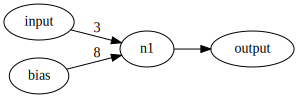

In [6]:
from fastbook import *

#Visualize the neural network, input -> node -> output
gv('''
input -> "n1" [label=3]
bias -> "n1" [label=8]
"n1" -> output
''')

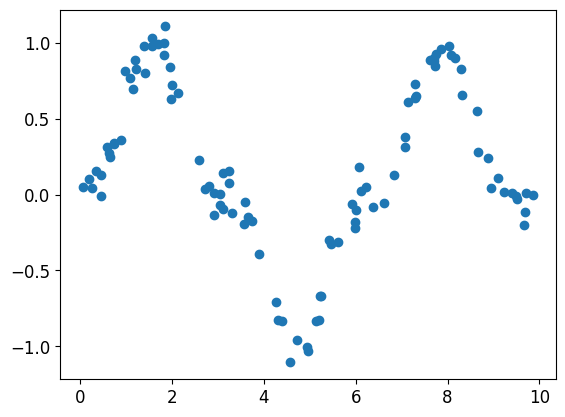

In [7]:
# create a non linear data with single feature
# y = sin(x) + noise

x_data = np.random.rand(100) * 10
noise = np.random.normal(0, 0.1, x_data.shape)
y_data = np.sin(x_data) ** 3 + noise

# plot the data
plt.scatter(x_data, y_data)
plt.show()

In [8]:
# solve the equation above using pytorch

import torch

class MySimpleNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


def loss(y, y_pred):
    return ((y_pred - y)**2).mean()


model = MySimpleNeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

x_tensor = torch.from_numpy(x_data).float().view(-1, 1)
y_tensor = torch.from_numpy(y_data).float().view(-1, 1)

for epoch in range(100):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}, loss {l.item():.4f}, w {model.linear.weight.item():.4f}, b {model.linear.bias.item():.4f}')

epoch 1, loss 23.5292, w 0.2300, b 0.7454
epoch 11, loss 0.3457, w -0.0781, b 0.6744
epoch 21, loss 0.3408, w -0.0748, b 0.6526
epoch 31, loss 0.3364, w -0.0716, b 0.6320
epoch 41, loss 0.3324, w -0.0686, b 0.6124
epoch 51, loss 0.3289, w -0.0658, b 0.5940
epoch 61, loss 0.3258, w -0.0631, b 0.5765
epoch 71, loss 0.3229, w -0.0606, b 0.5600
epoch 81, loss 0.3204, w -0.0582, b 0.5443
epoch 91, loss 0.3182, w -0.0559, b 0.5295


In [9]:
# solve the equation above using pytorch

import torch

class MySimpleNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(1, 10)
        self.linear_2 = torch.nn.Linear(10, 10)
        self.linear_3 = torch.nn.Linear(10, 1)

    def forward(self, x):
        return self.linear_3(self.linear_2(self.linear_1(x)))


def loss(y, y_pred):
    return ((y_pred - y)**2).mean()


model = MySimpleNeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

x_tensor = torch.from_numpy(x_data).float().view(-1, 1)
y_tensor = torch.from_numpy(y_data).float().view(-1, 1)

for epoch in range(100):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'epoch {epoch}, loss {l.item():.4f}')

epoch 0, loss 0.5562
epoch 10, loss 0.3066
epoch 20, loss 0.3041
epoch 30, loss 0.3027
epoch 40, loss 0.3017
epoch 50, loss 0.3009
epoch 60, loss 0.3004
epoch 70, loss 0.3000
epoch 80, loss 0.2997
epoch 90, loss 0.2995


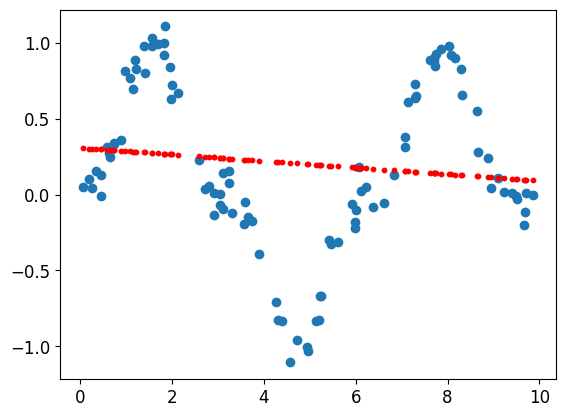

In [10]:
# Plot the model
plt.scatter(x_data, y_data)
plt.scatter(x_data, model(x_tensor).detach().numpy(), s=10, c='r')

plt.show()

In [11]:
# solve the equation above using pytorch

import torch

class MySimpleNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(1, 100)
        self.linear_2 = torch.nn.Linear(100, 100)
        self.linear_3 = torch.nn.Linear(100, 1)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        return self.linear_3(self.relu(self.linear_2(self.relu(self.linear_1(x)))))


def loss(y, y_pred):
    return ((y_pred - y)**2).mean()


model = MySimpleNeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

x_tensor = torch.from_numpy(x_data).float().view(-1, 1)
y_tensor = torch.from_numpy(y_data).float().view(-1, 1)

for epoch in range(10000):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'epoch {epoch}, loss {l.item():.4f}')

epoch 0, loss 0.3812
epoch 1000, loss 0.1587
epoch 2000, loss 0.1307
epoch 3000, loss 0.1296
epoch 4000, loss 0.1295
epoch 5000, loss 0.1291
epoch 6000, loss 0.1287
epoch 7000, loss 0.1285
epoch 8000, loss 0.1282
epoch 9000, loss 0.1275


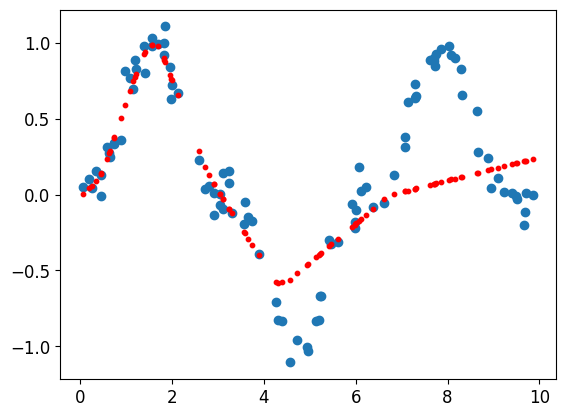

In [12]:
plt.scatter(x_data, y_data)
# Plot the model output using scatter plot
plt.scatter(x_data, model(x_tensor).detach().numpy(), s=10, c='r')

plt.show()

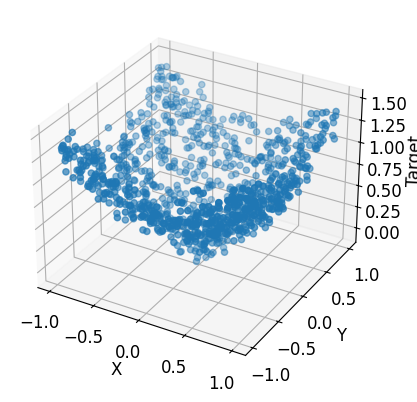

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate circle data set for regression
n_samples = 1000
X = np.random.rand(n_samples, 2) * 2 - 1
y = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
# add noise to y
y += 0.1 * np.random.randn(n_samples)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

# Set the x, y, and z labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Target')

plt.show()

In [14]:
# solve the equation above using pytorch

import torch

class MySimpleNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(2, 100)
        self.linear_2 = torch.nn.Linear(100, 100)
        self.linear_3 = torch.nn.Linear(100, 1)
        # self.relu = torch.nn.ReLU()

    def forward(self, x):
        # return self.relu(self.linear_3(self.relu(self.linear_2(self.relu(self.linear_1(x))))))
        return self.linear_3(self.linear_2(self.linear_1(x)))
    
loss = torch.nn.MSELoss()

model = MySimpleNeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

x_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float().view(-1, 1)

for epoch in range(1000):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'epoch {epoch+1}, loss {l.item():.4f}')

epoch 1, loss 0.6431
epoch 101, loss 0.0957
epoch 201, loss 0.0957
epoch 301, loss 0.0957
epoch 401, loss 0.0957
epoch 501, loss 0.0957
epoch 601, loss 0.0957
epoch 701, loss 0.0957
epoch 801, loss 0.0957
epoch 901, loss 0.0957


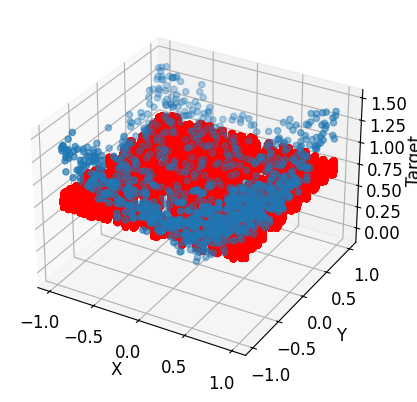

In [15]:
# Plot the result


# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

# Set the x, y, and z labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Target')

# draw the model
ax.scatter(X[:, 0], X[:, 1], model(x_tensor).detach().numpy(), c='r')

plt.show()

In [16]:
# solve the equation above using pytorch

import torch

class MySimpleNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(2, 100)
        self.linear_2 = torch.nn.Linear(100, 100)
        self.linear_3 = torch.nn.Linear(100, 1)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        return self.relu(self.linear_3(self.relu(self.linear_2(self.relu(self.linear_1(x))))))
    
loss = torch.nn.MSELoss()

model = MySimpleNeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

x_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float().view(-1, 1)

for epoch in range(1000):
    y_pred = model(x_tensor)
    l = loss(y_tensor, y_pred)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'epoch {epoch+1}, loss {l.item():.4f}')

epoch 1, loss 0.6942
epoch 101, loss 0.0096
epoch 201, loss 0.0091
epoch 301, loss 0.0090
epoch 401, loss 0.0089
epoch 501, loss 0.0089
epoch 601, loss 0.0089
epoch 701, loss 0.0088
epoch 801, loss 0.0087
epoch 901, loss 0.0089


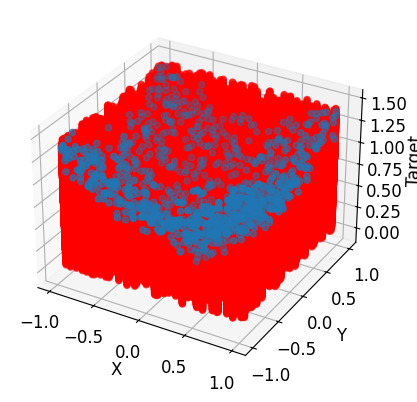

In [17]:
# Plot the result


# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

# Set the x, y, and z labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Target')

# draw the model
ax.scatter(X[:, 0], X[:, 1], model(x_tensor).detach().numpy(), c='r')

plt.show()